<a href="https://colab.research.google.com/github/vin136/NN-foundations/blob/main/Estimating_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

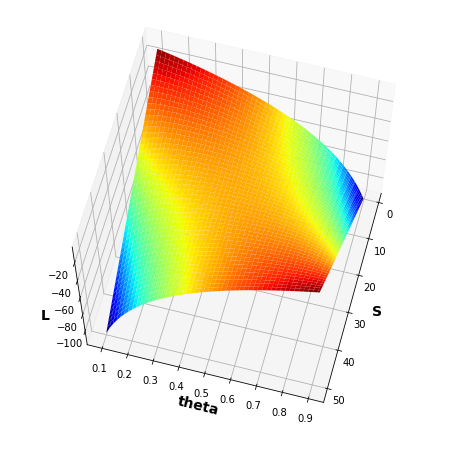

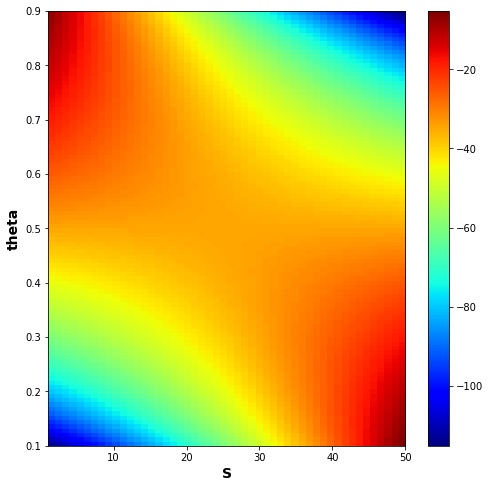

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
S = np.arange(1, N+1)
theta = np.linspace(0.1, 0.9, 100)
S_grid, theta_grid = np.meshgrid(S, theta)
L = S_grid*np.log(theta_grid) + (N-S_grid)*np.log(1-theta_grid)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_grid, theta_grid, L, cmap='jet')
ax.set_xlabel('S', fontsize=14, fontweight='bold')
ax.set_ylabel('theta', fontsize=14, fontweight='bold')
ax.set_zlabel('L', fontsize=14, fontweight='bold')
ax.view_init(elev=65, azim=15)

plt.figure(figsize=(8, 8))
plt.imshow(L, cmap='jet', extent=[1, N, 0.1, 0.9], aspect='auto')
plt.xlabel('S', fontsize=14, fontweight='bold')
plt.ylabel('theta', fontsize=14, fontweight='bold')
plt.colorbar()


Useful resources

1. [prob](https://probability4datascience.com/ch08.html)
2.[MLE VS MAP](https://zhiyzuo.github.io/MLE-vs-MAP/)
3. [Maths for ml](https://mml-book.github.io/book/mml-book.pdf),[github](https://github.com/mml-book/mml-book.github.io)
4. [BAP](https://github.com/aloctavodia/BAP/blob/master/code/Chp1/01%20Thinking%20Probabilistically.ipynb)
5. [Bayesian data analysis](https://avehtari.github.io/BDA_course_Aalto/index.html#Self_study_exercises)

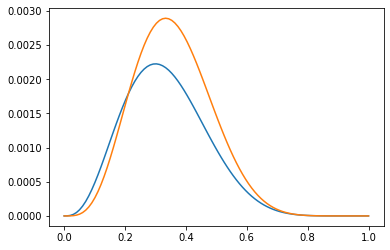

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Number of coin tosses
n_tosses = 10

# Number of heads
n_heads = 3

# Number of tails
n_tails = 7

# Prior: uniform
a_prior = 1
b_prior = 1
prior = beta(a_prior, b_prior)

# Likelihood
likelihood = lambda p, n_heads, n_tails: (p**n_heads)*((1-p)**n_tails)

# Posterior
posterior = lambda p, prior, likelihood, n_heads, n_tails: prior.pdf(p)*likelihood(p, n_heads, n_tails)

# Plotting
p = np.linspace(0, 1, 100)
plt.plot(p, posterior(p, prior, likelihood, n_heads, n_tails),label='Uniform Prior')

# Prior: beta(2,2)
a_prior = 2
b_prior = 2
prior = beta(a_prior, b_prior)

# Plotting
p = np.linspace(0, 1, 100)
plt.plot(p, posterior(p, prior, likelihood, n_heads, n_tails),label='Beta(2,2) Prior')




In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


data = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]  # 1 for heads, 0 for tails
n_heads = sum(data)
n_tails = len(data) - n_heads

prior_mean = 0.5
prior_std = 0.1


# Likelihood
theta = np.linspace(0, 1, 1000)
likelihood = stats.binom.pmf(n_heads, len(data), theta)

# Prior
prior = stats.norm.pdf(theta, prior_mean, prior_std)

# Posterior
posterior = likelihood * prior
posterior /= np.sum(posterior)


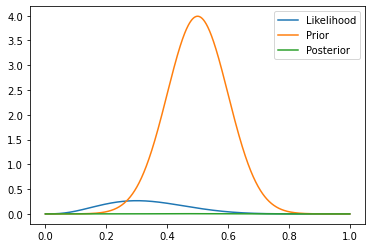

In [5]:
plt.plot(theta, likelihood, label='Likelihood')
plt.plot(theta, prior, label='Prior')
plt.plot(theta, posterior, label='Posterior')
plt.legend()
plt.show()


In [6]:
mean_posterior = sum(posterior*theta)
variance_posterior = sum(posterior*(theta-mean_posterior)**2)
print("Mean of Posterior : {} \nVariance of Posterior : {}".format(mean_posterior, variance_posterior))


Mean of Posterior : 0.4421012482369761 
Variance of Posterior : 0.007064707516766254


MAP (Uniform prior): 0.30303030303030304
MAP (Beta(0.5, 0.5) prior): 0.0
MAP (Beta(5, 1) prior): 0.5050505050505051
MAP (Beta(1, 5) prior): 0.21212121212121213


<ipython-input-10-8754460eba3f>:20: RuntimeWarning: invalid value encountered in multiply
  posterior = likelihood * prior


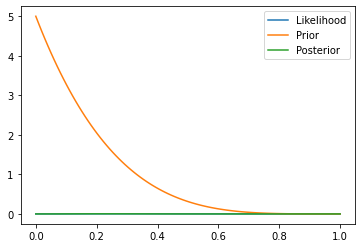

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# data
n_heads = 3
n_tails = 7
n_tosses = n_heads + n_tails
theta_prior = np.linspace(0, 1, 100)

# uniform prior
prior = np.ones(100)
likelihood = theta_prior**n_heads * (1-theta_prior)**n_tails
posterior = likelihood * prior
MAP = theta_prior[np.argmax(posterior)]
print("MAP (Uniform prior):", MAP)

# Beta(0.5,0.5) prior
prior = beta.pdf(theta_prior, 0.5, 0.5)
posterior = likelihood * prior
MAP = theta_prior[np.argmax(posterior)]
print("MAP (Beta(0.5, 0.5) prior):", MAP)

# Beta(5,1) prior
prior = beta.pdf(theta_prior, 5, 1)
posterior = likelihood * prior
MAP = theta_prior[np.argmax(posterior)]
print("MAP (Beta(5, 1) prior):", MAP)

# Beta(1,5) prior
prior = beta.pdf(theta_prior, 1, 5)
posterior = likelihood * prior
MAP = theta_prior[np.argmax(posterior)]
print("MAP (Beta(1, 5) prior):", MAP)

# Plotting 
plt.figure()
plt.plot(theta_prior, likelihood, label='Likelihood')
plt.plot(theta_prior, prior, label='Prior')
plt.plot(theta_prior, posterior, label='Posterior')
plt.legend()
plt.show()


In [12]:
import math

def beta_pdf(x, a, b):
    """Probability density function for the beta distribution"""
    if x < 0 or x > 1:
        return 0
    return (x**(a-1) * (1-x)**(b-1)) / (math.gamma(a) * math.gamma(b) / math.gamma(a+b))

# Example usage:
a = 2
b = 3
x = 0.5
print(beta_pdf(x, a, b))


1.5


In [13]:
import scipy.stats as stats

a = 2
b = 3
x = 0.5
print(stats.beta.pdf(x, a, b))


1.5000000000000004


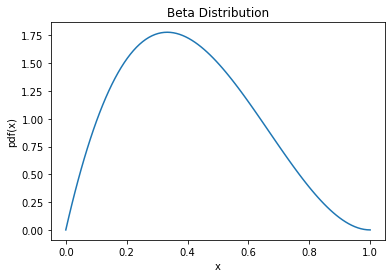

In [14]:
import matplotlib.pyplot as plt
import numpy as np

a = 2
b = 3
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('Beta Distribution')
plt.show()


In [ ]:
import numpy as np
import scipy as sp

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



Imagine I asked you to tell the proportion of water on earth. Incase you already know it, pretend you just forgot it ( nor can you search online or ask your friend). But, you found a toy globe model of the earth. With your faith in fellow humans, you decide to use it to determine the true proprotion of water. 

Here's the idea. You will toss the globe and catch it for `n` times. And you note how many times it landed on `Water`. Let's denote it by `y`. Let the true parameter be `θ`, which we seek to estimate. Supposed you tossed for `n = 10` times and you landed on water `y = 7` times.  More precisely here's the data [0,0,0,1,1,1,1,1,1,1], where `1`:water,`0`:land.

Before proceeding, let's see bayes rule once again as it might come handy,

## Bayes Rule



Bayes rule is often used to compute a distribution over possible values of a **hidden variable** or **hypothesis** $h \in \cal{H}$ after observing some evidence $Y=y$. We can write this as follows:


$$
\begin{align}
p(H=h|Y=y) &= \frac{p(H=h) p(Y=y|H=h)}{p(Y=y)} \\
\text{posterior}(h|y) &= \frac{\text{prior}(h) * \text{likelihood}(y|h)}{\text{marginal-likelihood}(y)}
 \end{align}
 $$ 

In our case,


\begin{equation}
\text{P}(θ|y) = \frac{\text{P}(y|\theta) \times \text{P}(θ)}{\text{P}(y)}
\end{equation}


## Approach

Let's start thinking about what we can do ? We are told that we do not know anything about the true proportion of water. But, is it the case ?

- we know `θ` ∈ [0,1]

- If we knew true `θ` the model for predicting `y` would be `binomial`

\begin{equation}
P(y | θ,n) = \binom{n}{y} θ^y (1-θ)^{n-y}
\end{equation}







### Question 1

a. How likely it is to see water 7 times out of 10 tosses(as we happened to note in our experiment) , if the true θ were `0.1`,`0.5`,`0.9` respectively ?

b. Now if you were to choose a single value out of the above 3 for the true  θ , which one would you choose and why ?



In [20]:
from scipy.stats import binom

c. Fill the missing lines 

In [22]:
# But why to check only those three theta's, we can check all theta's

possible_thetas = np.linspace(0,1,100)

#evaluate the likelihood values of `possible_thetas`
possible_likelihoods = [binom.pmf(7, 10, p) for p in possible_thetas]

# what's the value of theta with maximum value of likelihood.
max_lik_est_theta = possible_thetas[np.argmax(possible_likelihoods)]

d. Now we can declare that our true theta is equal to our `max_lik_est_theta`. But is it so ? What if you borrowed the globe from your friend and he let's you toss it only once and you got `land`.(also true in our experiment where the first toss was `0`/`land`.) What's your estimate for the true proportion of water based on MLE estimator ?

e. Hopefully by now you realized some problems with `MLE` estimators. What to do ? Baye's rule comes to the rescue. We saw in class how using priors let's us encode our beliefs. `MAP`(maximum a posterior) seeks to pick the θ that maximizes the posterior. Let's see this in action. Calculate the `MAP` estimate of `θ`, if our `prior` is Uniform distribution between [0,1], n = 1,y = 0 (as considered in d.) ? Now change the prior to beta(2,2), what's your new `MAP` estimate for `theta` ?



It turns out that we can use bayes rule to get the complete posterior. Consider the outcome of our first experment ([0,0,1,1,1,0,0,1,1,1], where `1`:water,`0`:land.). For a fixed prior Beta(2,2), below plot generates the posterior after seeing each observation and calculates the corresponding `MAP` estimate. 

In [47]:
def plot_beta_prior(alpha,beta):
  import matplotlib.pyplot as plt
  import numpy as np

  a = alpha
  b = beta
  x = np.linspace(0,1,100)
  plt.plot(x, stats.beta.pdf(x, a, b))
  plt.xlabel('x')
  plt.ylabel('pdf(x)')
  plt.title(f'Prior Beta({a,b}) Distribution')
  plt.show()


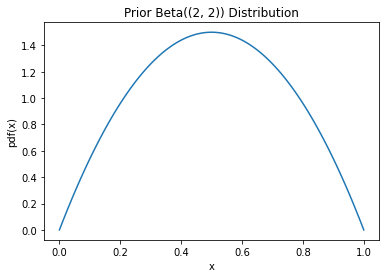

In [48]:
plot_beta_prior(2,2)

In [49]:
def plot_beta_posterior_ondata(alpha,beta,y_obs):

  

  #since our prior is beta(2,2), our posterior will have a close form solution, beta(alpha+y,beta-y+1). Refer Extra's for the proof.
  cur_water_cnt = 0
  #let's take 1000 values for our posterior theta to evaluate our posterior
  pos_theta_x = np.linspace(0, 1, 1000)


  cur_alpha = alpha
  cur_beta = beta
  fig, ax_arr = plt.subplots(ncols=5,nrows=2 ,figsize=(32,8), sharex=True)
  for i,obs in enumerate(y_obs):
    if i<5:
      ax = ax_arr[0,i]
    else:
      ax = ax_arr[1,i-5]
    cur_alpha += obs
    cur_beta = (cur_beta-obs+1)
    #evaluates the pdf of the posterior
    pos_theta_y = sp.stats.beta.pdf(x=pos_theta_x, a=cur_alpha, b=cur_beta)
    ax.plot(pos_theta_x, pos_theta_y, linewidth=3)
    #it turns out that the MAP for beta distribution also has a closed form solution but we can just look at the max directly.
    mode = pos_theta_x[np.argmax(pos_theta_y)]
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title(f"After {i}th sample:{obs},MAP={round(mode,3)}")
  fig.tight_layout()




    





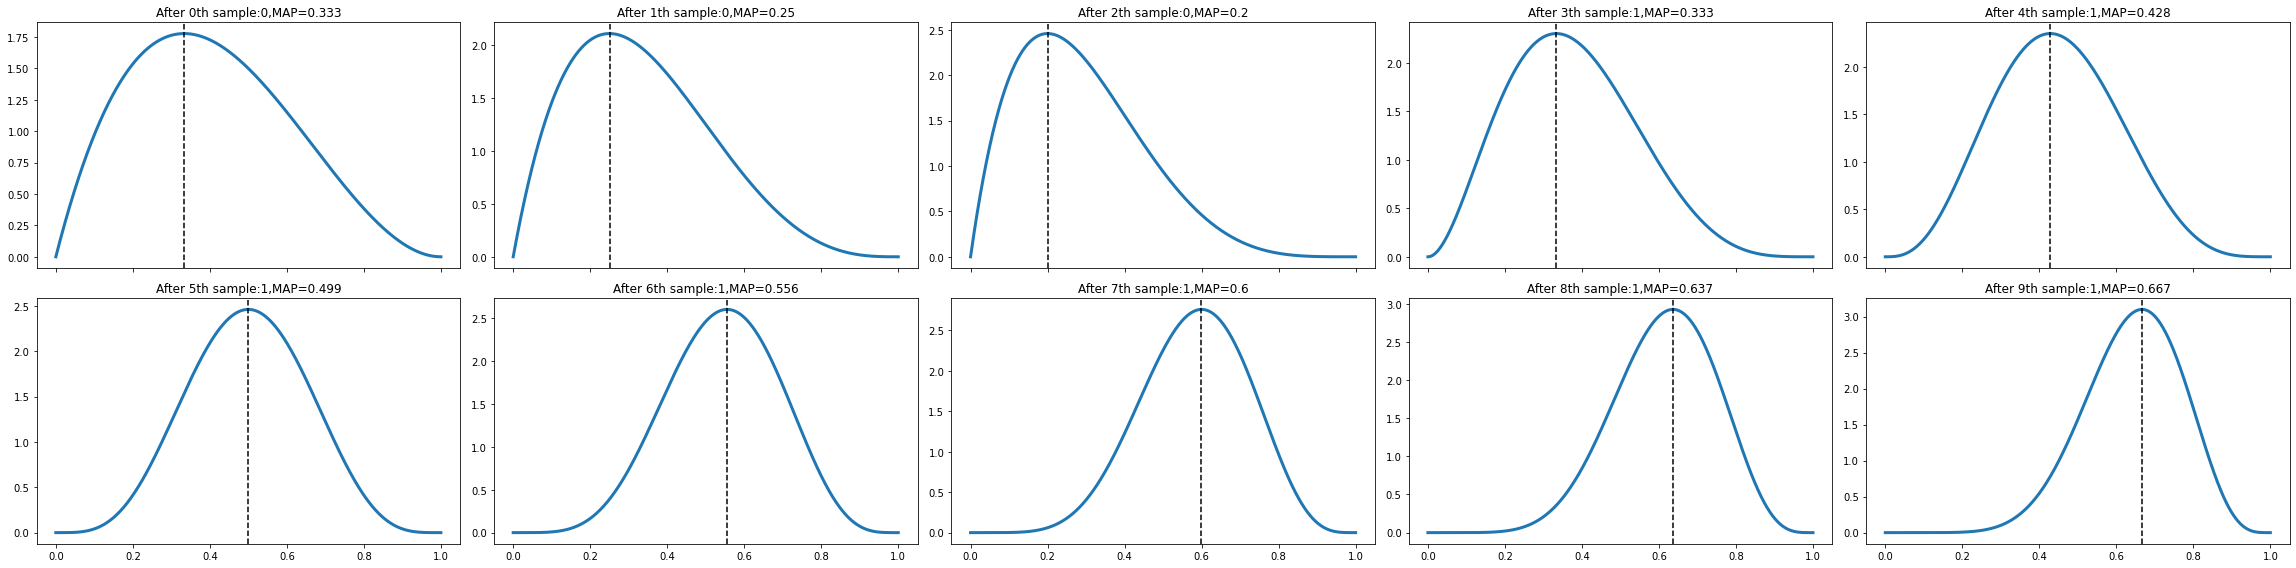

In [50]:
alpha = beta = 2
y_obs = [0,0,0,1,1,1,1,1,1,1]

plot_beta_posterior_ondata(alpha,beta,y_obs)

f. Analyze the below plots and give a one line justification of how `MAP` estimates addressed the problem that we encountered earlier with `MLE`(i.e when we observed only one data point `0`) ?

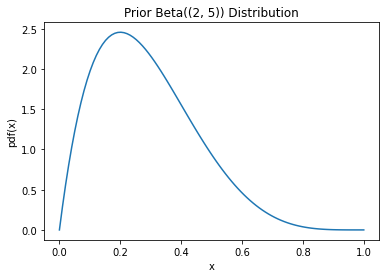

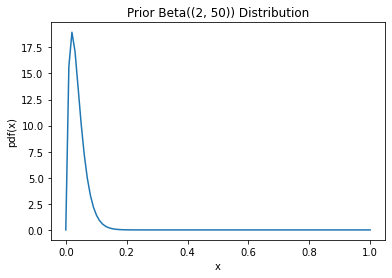

In [52]:
# understandig beta distributions, what happens if we increase beta

plot_beta_prior(2,5)
plot_beta_prior(2,50)

Now let's cheat a little bit. We know that true proportion of water is about 0.71. Let's generate 1000 samples from a bernouli distribution with p= 0.71 and see how our `MAP` estimates differ from `MLE`  ?

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000])

In [57]:
n = 10
true_theta = 0.71
y_obs = np.random.choice([0, 1], p=[1-true_theta, true_theta], size=1000)

def plot_beta_posterior_ondata(alpha,beta,y_obs):

  

  #since our prior is beta(2,2), our posterior will have a close form solution, beta(alpha+y,beta-y+1). Refer Extra's for the proof.
  cur_water_cnt = 0
  #let's take 1000 values for our posterior theta to evaluate our posterior
  pos_theta_x = np.linspace(0, 1, 1000)


  cur_alpha = alpha
  cur_beta = beta
  fig, ax_arr = plt.subplots(ncols=5,nrows=2 ,figsize=(32,8), sharex=True)
  for i,ind in enumerate(np.arange(0,1010,10)):
    obs = y_obs[ind]
    if i<5:
      ax = ax_arr[0,i]
    else:
      ax = ax_arr[1,i-5]
    cur_alpha = cur_alpha + sum(y_obs[:ind+1])
    cur_beta = cur_beta + 1 - sum(y_obs[:ind+1])
    #evaluates the pdf of the posterior
    pos_theta_y = sp.stats.beta.pdf(x=pos_theta_x, a=cur_alpha, b=cur_beta)
    ax.plot(pos_theta_x, pos_theta_y, linewidth=3)
    #it turns out that the MAP for beta distribution also has a closed form solution but we can just look at the max directly.
    mode = pos_theta_x[np.argmax(pos_theta_y)]
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title(f"After {ind}th sample:{obs},MAP={round(mode,3)},MLE:{round(sum(y_obs[:ind+1]),2)}")
  fig.tight_layout()




    





In [ ]:
f.

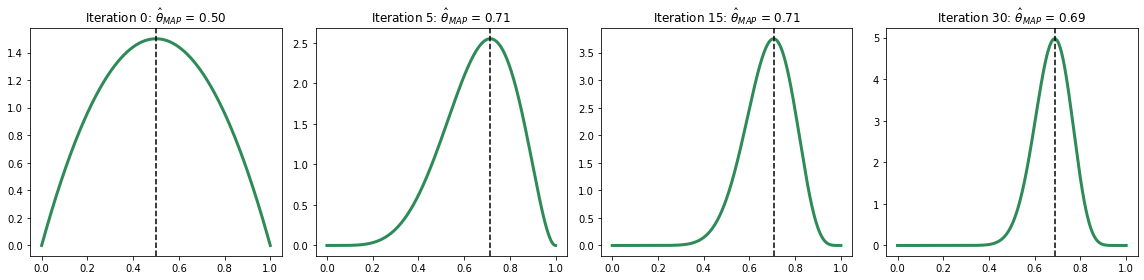

In [28]:
import scipy as sp
beta_X = np.linspace(0, 1, 1000)
my_color = '#2E8B57'
fig, ax_arr = plt.subplots(ncols=4, figsize=(16,4), sharex=True)
for i, iter_ in enumerate([0, 5, 15, 30]):
    ax = ax_arr[i]
    a, b = beta_arr[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

Assume that the prior distribution of $p$ is a beta distribution with parameters $\alpha$ and $\beta$:

\begin{equation}
p(p) = \text{Beta}(p; \alpha, \beta) = \frac{p^{\alpha-1} (1-p)^{\beta-1}}{B(\alpha,\beta)}
\end{equation}

where $B(\alpha,\beta)$ is the beta function.

The likelihood function for a binomial model with parameters $p$ and $n$ is given by:

\begin{equation}
L(p; x) = \binom{n}{x} p^x (1-p)^{n-x}
\end{equation}

where $x$ is the number of successful trials and $n$ is the total number of trials.

The posterior distribution is given by:
\begin{align}
p(p|x) &\propto p(p)L(p;x) \\
&\propto p^{\alpha+x-1}(1-p)^{\beta+n-x-1}
\end{align}

To find the MAP estimate we take the derivative of the logarithm of the posterior distribution with respect to $p$, and set it equal to zero.

\begin{align}
\frac{d}{dp} \log(p(p|x)) &= \frac{d}{dp}\left[(\alpha+x-1)\log(p)+(\beta+n-x-1)\log(1-p)\right]\\
&=\frac{\alpha+x-1}{p} -\frac{\beta+n-x-1}{1-p}=0
\end{align}

Solving for $p$ we get:
\begin{align}
\frac{\alpha+x-1}{p} =\frac{\beta+n-x-1}{1-p}\
p(\alpha+x-1)=(\beta+n-x-1) \
p = \frac{\alpha+x-1}{\alpha+\beta+n-1}
\end{align}

So the MAP estimator for $p$ is $\hat{p}_{MAP} = \frac{\alpha+x-1}{\alpha+\beta+n-1}$

0.696969696969697



The likelihood function for a binomial model with parameters $p$ and $n$ is given by:

\begin{equation}
L(p; x) = \binom{n}{x} p^x (1-p)^{n-x}
\end{equation}

where $x$ is the number of successful trials and $n$ is the total number of trials.

To find the MLE, we take the derivative of the likelihood function with respect to $p$ and set it equal to zero:

\begin{align}
\frac{d}{dp} L(p; x) &= \frac{d}{dp} \binom{n}{x} p^x (1-p)^{n-x} \\
&= \binom{n}{x} x p^{x-1} (1-p)^{n-x} - \binom{n}{x} p^x (n-x)(1-p)^{n-x-1} \\
&= \binom{n}{x} x p^{x-1} - \binom{n}{x} p^x (n-x)(1-p) \\
&= \binom{n}{x} p^{x-1} (x - p(n-x)) = 0
\end{align}

Solving for $p$, we get:

\begin{align}
x - p(n-x) &= 0 \\
p &= \frac{x}{n}
\end{align}

So the MLE for $p$ is $\hat{p}_{MLE} = \frac{x}{n}$



In [15]:

n = 10
theta = 0.71
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=10)

In [17]:
X_arr 

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
thetas = [0.2,0.5]